In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('exams.csv') #reading the csv file
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [2]:
df.describe() #finding descriptive stastics for the numerical dataframe

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [3]:
df.describe(include='O') #finding descriptive stastics for the non numerical dataframe 

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,male,group C,some college,standard,none
freq,508,323,224,660,656


In [4]:
df.isna().sum() #finding missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.15,random_state=50) # split the Data into training and testing(15%) sets

C:\Users\dell\AppData\Local\Temp\ipykernel_9888\1890783806.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, y=feature, ax=axes[i], palette=palette_color)
C:\Users\dell\AppData\Local\Temp\ipykernel_9888\1890783806.py:30: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=train, y=feature, ax=axes[i], palette=palette_color)
C:\Users\dell\AppData\Local\Temp\ipykernel_9888\1890783806.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, y=feature, ax=axes[i], palette=palette_color)
C:\Users\dell\AppData\Local\Temp\ipykernel_9888\1890783806.py:30: UserWarning: The palette list has more values (10) th

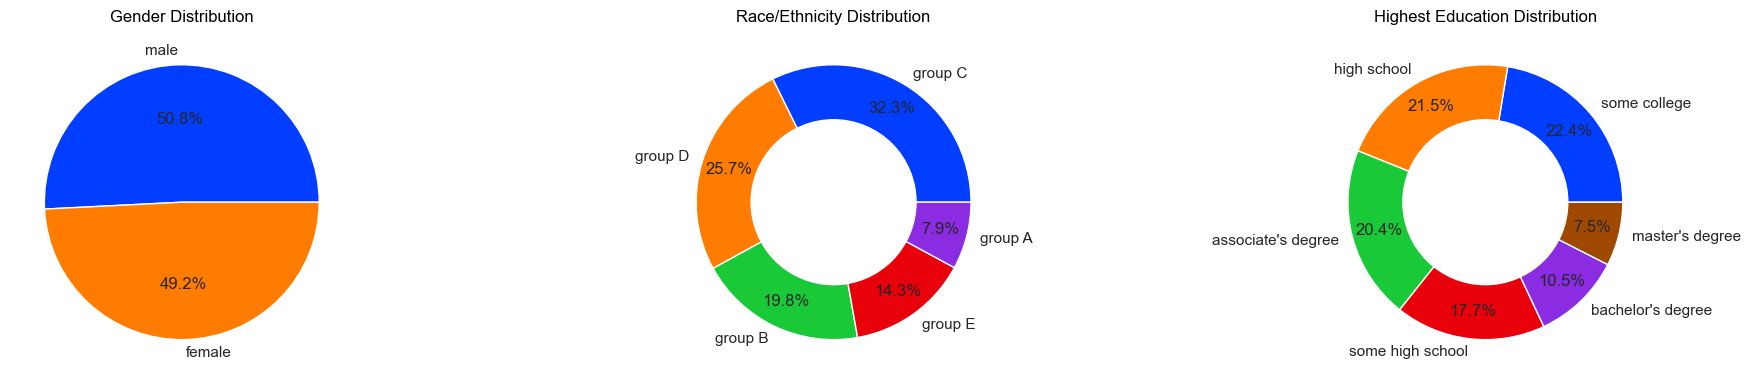

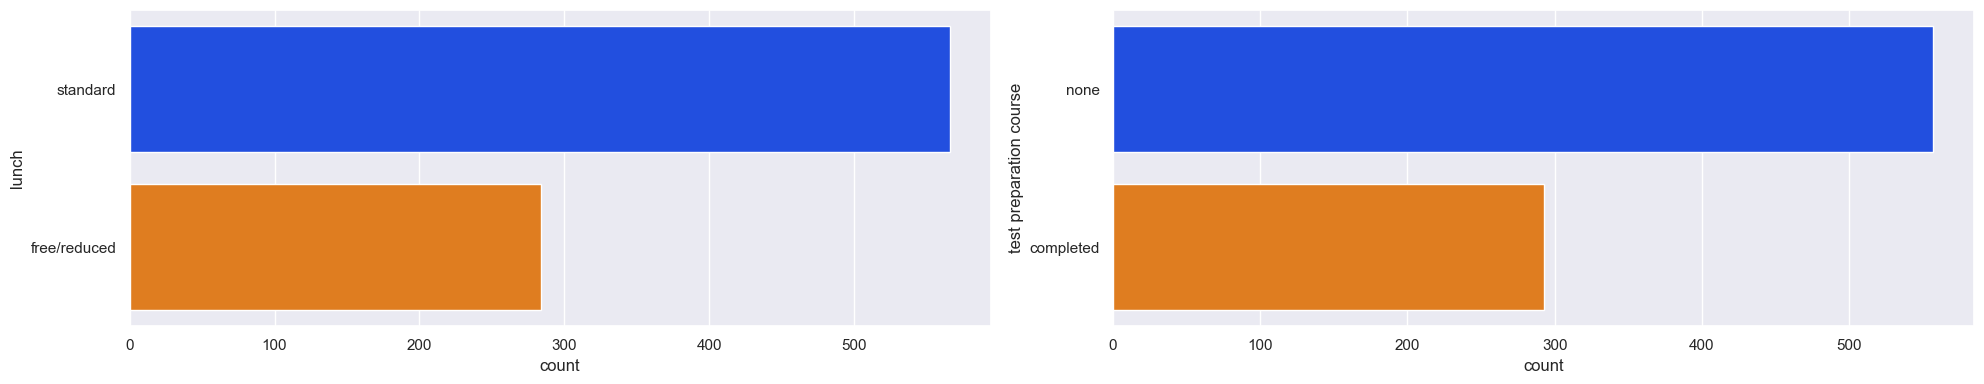

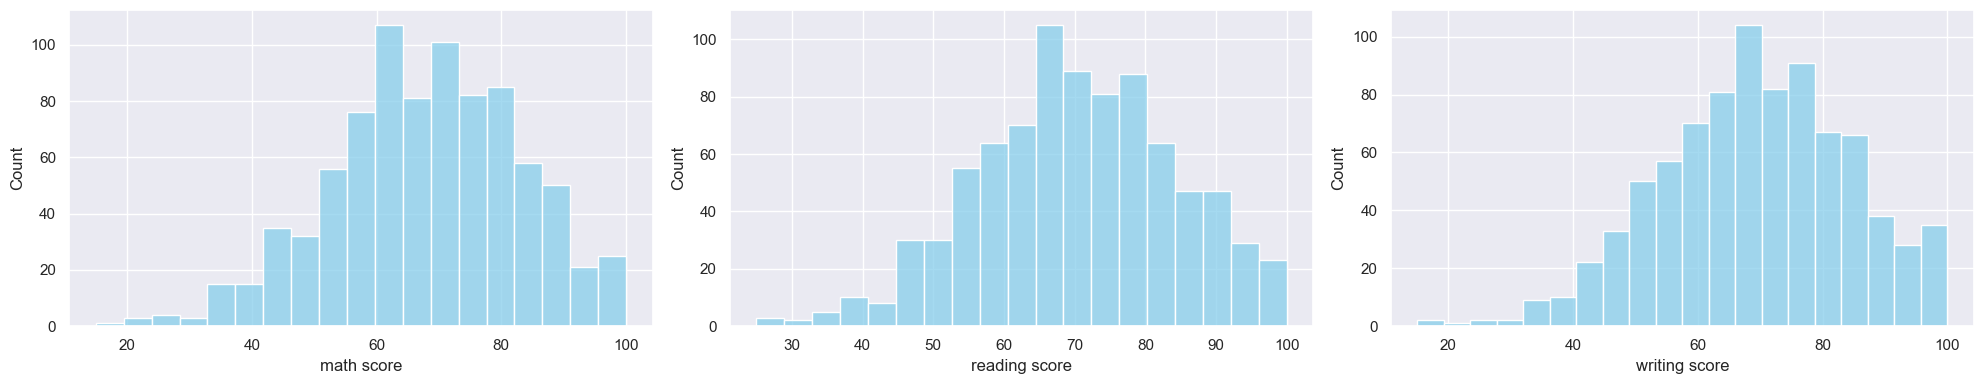

In [6]:
# Get the features
features = df.columns

# we create a figure with 1 row and 3 columns then We loop over these features and plot  
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
palette_color = sns.color_palette('bright') 
sns.set_theme()

gender = df["gender"].value_counts()
axes[0].pie(gender, labels=gender.index, autopct='%.1f%%', colors=palette_color)
axes[0].set_title('Gender Distribution')

race = df["race/ethnicity"].value_counts()
axes[1].pie(race, labels=race.index, autopct='%.1f%%', colors=palette_color, pctdistance=0.80,)
centre_circle1 = plt.Circle((0,0),0.60,fc='white')
axes[1].add_artist(centre_circle1)
axes[1].set_title('Race/Ethnicity Distribution')

highest_education = df["parental level of education"].value_counts()
axes[2].pie(highest_education, labels=highest_education.index, autopct='%.1f%%',colors=palette_color, pctdistance=0.80,)
centre_circle2 = plt.Circle((0,0),0.60,fc='white')
axes[2].add_artist(centre_circle2)
axes[2].set_title('Highest Education Distribution')
plt.tight_layout()


# same as before and plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
for i, feature in enumerate(features[3:5]):
    sns.countplot(data=train, y=feature, ax=axes[i], palette=palette_color)
plt.tight_layout()

# same as before and plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
for i, feature in enumerate(features[5:]):
    sns.histplot(data=train, x=feature, ax=axes[i], color='skyblue')
plt.tight_layout()
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_9888\2538192297.py:8: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.boxplot(data=train, palette=palette_color, orient="h", ax=axes3)


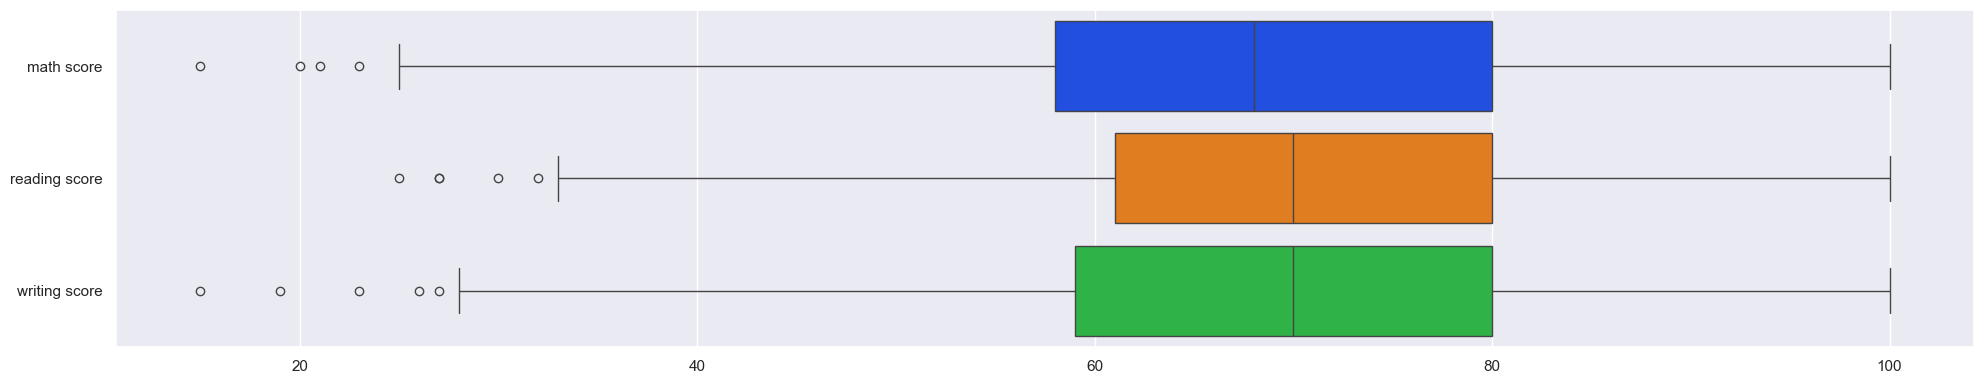

In [7]:
# Get the features
features = df.columns

# Create a figure
fig3, axes3 = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))

# Start plotting boxplots from index 5
sns.boxplot(data=train, palette=palette_color, orient="h", ax=axes3)
plt.tight_layout()
plt.show()

In [8]:
# Removing outliers for better model
train=train[train['reading score']>=30]
train=train[train['writing score']>=20]
train=train[train['math score']>=19]
print(len(train))

846


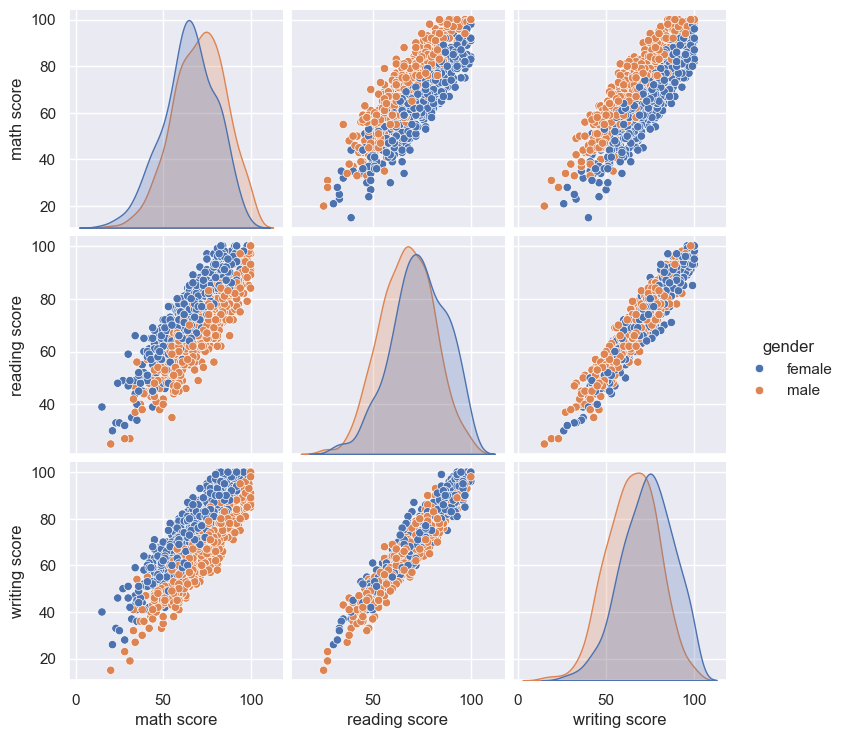

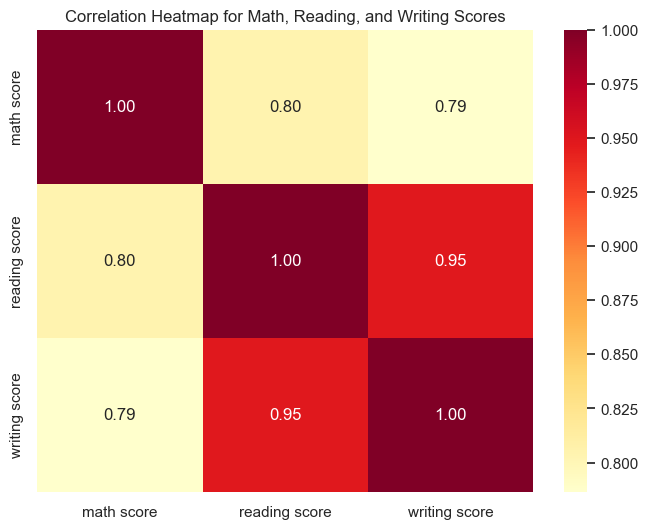

In [9]:
sns.pairplot(df, hue='gender')

# Selecting only the columns for math, reading, and writing scores
scores = train[['math score', 'reading score', 'writing score']]

# the correlation matrix measures the strength and direction of the linear relationship between two variables [-1 , 1].
correlation_matrix = scores.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f")
plt.title("Correlation Heatmap for Math, Reading, and Writing Scores")
plt.show()



In [10]:
# For training data
train_y = train.pop('math score')  # Extract 'math score' it represents the target variable (dependent) (the variable you want to predict)
train_x = train  # The remaining columns are features of the trainig data (independent variables)

# For testing data
test_y = test.pop('math score')  # Extract 'math score' column as target variable
test_x = test  # The remaining columns are features

In [11]:
#Encoding categorical variables and binary encoding race/ethnicity
# we need encoding before doing regression to convert non numerical data to numerical one as of zeros and ones

train_x['gender']=train_x['gender'].replace({"male":0,"female":1}) #encode gender
test_x['gender']=test_x['gender'].replace({"male":0,"female":1}) 

train_x['lunch']=train_x['lunch'].replace({"standard":0,"free/reduced":1}) #encode lunch
test_x['lunch']=test_x['lunch'].replace({"standard":0,"free/reduced":1})


train_x['test preparation course']=train_x['test preparation course'].replace({"none":0,"completed":1}) # Encode test preparation course
test_x['test preparation course']=test_x['test preparation course'].replace({"none":0,"completed":1})

train_x['parental level of education']=train_x['parental level of education'].replace({'some high school':0,'high school':1,'some college':2,'associate\'s degree':3 ,'bachelor\'s degree':4,'master\'s degree':5})
test_x['parental level of education']=test_x['parental level of education'].replace({'some high school':0,'high school':1,'some college':2,'associate\'s degree':3 ,'bachelor\'s degree':4,'master\'s degree':5})

import category_encoders as ce # Binary encoding for race/ethnicity 
encoder = ce.BinaryEncoder(cols=['race/ethnicity'])
encoded_train_x = encoder.fit_transform(train_x)
encoded_test_x = encoder.transform(test_x)

C:\Users\dell\AppData\Local\Temp\ipykernel_9888\2175002063.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_x['gender']=train_x['gender'].replace({"male":0,"female":1}) #encode gender
C:\Users\dell\AppData\Local\Temp\ipykernel_9888\2175002063.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_x['gender']=test_x['gender'].replace({"male":0,"female":1})
C:\Users\dell\AppData\Local\Temp\ipykernel_9888\2175002063.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version

In [12]:
from sklearn.preprocessing import MinMaxScaler # to scale the numerical features in the dataset between 0,1
 
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
train_scaled_columns = scaler.fit_transform(encoded_train_x[['reading score', 'writing score']].values)
encoded_train_x[['reading score','writing score']] = train_scaled_columns

# Transform the testing data
test_scaled_columns = scaler.transform(encoded_test_x[['reading score', 'writing score']].values)
encoded_test_x.loc[:, ['reading score','writing score']] = test_scaled_columns

C:\Users\dell\AppData\Local\Temp\ipykernel_9888\384177122.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.4        0.74285714 0.27142857 0.28571429 0.9        0.7
 0.6        0.5        0.6        0.94285714 0.55714286 0.35714286
 0.8        0.55714286 0.28571429 0.28571429 0.44285714 0.74285714
 0.95714286 0.25714286 0.84285714 0.7        0.97142857 0.65714286
 0.8        0.25714286 0.52857143 0.82857143 0.78571429 0.54285714
 0.28571429 0.9        0.61428571 0.51428571 0.45714286 0.38571429
 0.68571429 0.72857143 0.3        0.64285714 0.61428571 0.34285714
 0.52857143 0.72857143 0.42857143 0.54285714 0.25714286 0.71428571
 0.64285714 0.58571429 0.6        0.6        0.75714286 0.71428571
 0.51428571 0.5        0.6        0.52857143 0.5        0.55714286
 0.68571429 0.11428571 0.65714286 0.65714286 0.58571429 0.65714286
 0.81428571 0.64285714 0.85714286 0.44285714 0.8        0.32857143
 0.55714286 0.571428

In [13]:
encoded_train_x

,gender,race/ethnicity_0,race/ethnicity_1,race/ethnicity_2,parental level of education,lunch,test preparation course,reading score,writing score
264,1,0,0,1,2,0,0,0.771429,0.770270
469,0,0,1,0,3,0,1,0.542857,0.581081
144,1,0,1,0,3,0,0,0.371429,0.459459
901,1,0,1,0,1,0,0,0.742857,0.743243
331,0,0,1,0,3,0,0,0.571429,0.500000
...,...,...,...,...,...,...,...,...,...
289,1,1,0,1,5,0,0,0.571429,0.621622
109,0,1,0,0,2,0,0,0.728571,0.689189
907,0,0,1,0,1,0,1,0.600000,0.554054
480,1,0,0,1,1,0,0,0.000000,0.000000


In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

poly_features = PolynomialFeatures(degree=3) # generate polynomial features of third degree.

poly_encoded_train_x=poly_features.fit_transform(encoded_train_x) #This generates polynomial of third degree for training and testing data.
poly_encoded_test_x=poly_features.fit_transform(encoded_test_x)
polynomial_model=LinearRegression()
# This trains the model to learn the relationship between the polynomial features and the target variable
polynomial_model.fit(poly_encoded_train_x,train_y)

#predict on both the training and testing datasets
train_predicted=polynomial_model.predict(poly_encoded_train_x) 
test_predicted=polynomial_model.predict(poly_encoded_test_x)

# R^2 shows how well the model fits the data between 0 , 1
# MSE provides a measure of the model's accuracy in predicting the target variable ( maths score )
print(f'the train r^2 = {polynomial_model.score(poly_encoded_train_x,train_y)} the train MSE = {mean_squared_error(train_y,train_predicted)}')
print(f'the test r^2 = {polynomial_model.score(poly_encoded_test_x,test_y)}  the test MSE = {mean_squared_error(test_y,test_predicted)}')

the train r^2 = 0.8912505525720814 the train MSE = 24.218875544494107
the test r^2 = 0.8520771690335559  the test MSE = 35.087926642652654


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Define the pipeline that has polynomial feature and linear regression
poly_features = PolynomialFeatures()
linear_regression = LinearRegression()
pipeline = Pipeline([
    ('poly_features', poly_features),
    ('linear_regression', linear_regression)
])

# Define the parameter grid to try diffrent degrees
param_grid = {
    'poly_features__degree': [1, 2, 3, 4]
}

# Instantiate GridSearch to search for the best combination of polynomial degrees using cross-validation
# We use 6-fold cross-validation (cv=6) which means data is divided into 6 parts
# one of the 6 parts is used as the testing set, and the remaining 5 parts are used as the training set then repeat with another part

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=6)

# Fit GridSearch to search for the best combination of polynomial degrees using cross-validation
grid_search.fit(encoded_train_x, train_y)

# Get the best model that is obtained from grid search
new_model = grid_search.best_estimator_

# We make predictions on training and testing data using the best model obtained from grid search.
train_predicted = new_model.predict(encoded_train_x)
test_predicted = new_model.predict(encoded_test_x)

# Print results

print(f"Best Parameters: {grid_search.best_params_}") # to print the best polynomial obtained from grid search
print(f"Best Cross-Validation Score: {grid_search.best_score_}") # prints the best cross-validation score.

# print R^2 and MSE of the new model
print(f'Training R^2: {new_model.score(encoded_train_x, train_y)}, Training MSE: {mean_squared_error(train_y, train_predicted)}')
print(f'Test R^2: {new_model.score(encoded_test_x, test_y)}, Test MSE: {mean_squared_error(test_y, test_predicted)}')

# Get coefficients and interceptions
coefficients = new_model.named_steps['linear_regression'].coef_[1:]
intercept = new_model.named_steps['linear_regression'].intercept_

# Construct the equation
# The equation represents the relationship between the features and the target variable ( math score)
# the coefficients represent the contribution of each feature to the target variable
# X1 represents gender , X2 represents race and so on 

equation = f'y = {intercept}'
for i, coef in enumerate(coefficients):
    equation += f' + {round(coef, 3)} * x{i+1}'

print("Equation:", equation)

coefficients_dict = {column_name: coef for coef, column_name in zip(coefficients, encoded_train_x.columns)}


Best Parameters: {'poly_features__degree': 1}
Best Cross-Validation Score: 0.8590702376734533
Training R^2: 0.866699348001891, Training MSE: 29.686513146487176
Test R^2: 0.8785304057321985, Test MSE: 28.81310603059137
Equation: y = 37.580725982633666 + -12.852 * x1 + 2.212 * x2 + -0.389 * x3 + -1.171 * x4 + 0.047 * x5 + -4.278 * x6 + -4.119 * x7 + 18.615 * x8 + 49.858 * x9


C:\Users\dell\AppData\Local\Temp\ipykernel_9888\3674174082.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients_df.index, y=coefficients_df['Coefficient'], palette='coolwarm')


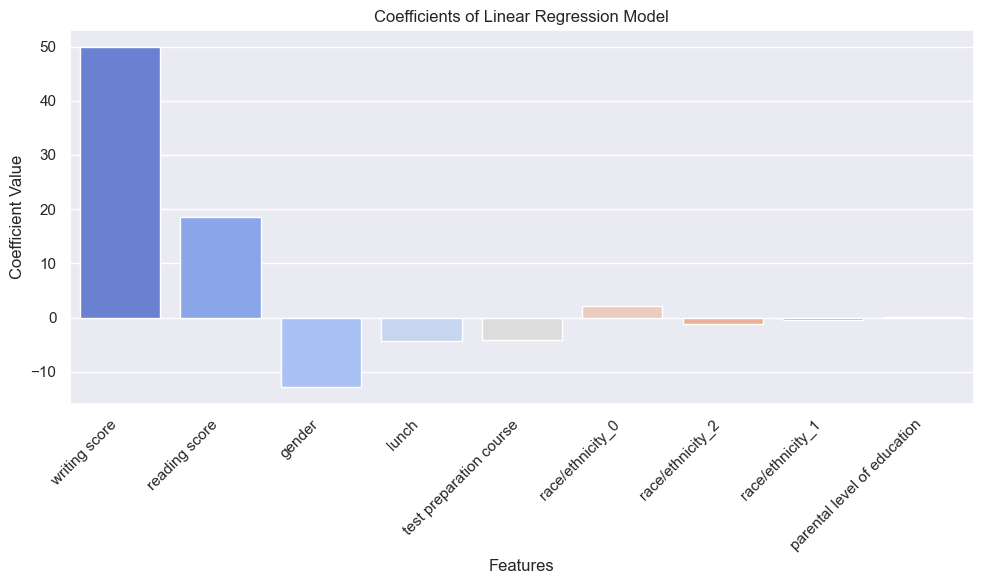

In [17]:
# Create DataFrame from coefficients_dict
coefficients_df = pd.DataFrame.from_dict(coefficients_dict, orient='index', columns=['Coefficient'])

# Sort DataFrame by absolute values of coefficients
coefficients_df['Absolute_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# By analyzing plot, you can identify which features have the most significant influence on the predicted math score
# Plot barplot for coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients_df.index, y=coefficients_df['Coefficient'], palette='coolwarm')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of Linear Regression Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


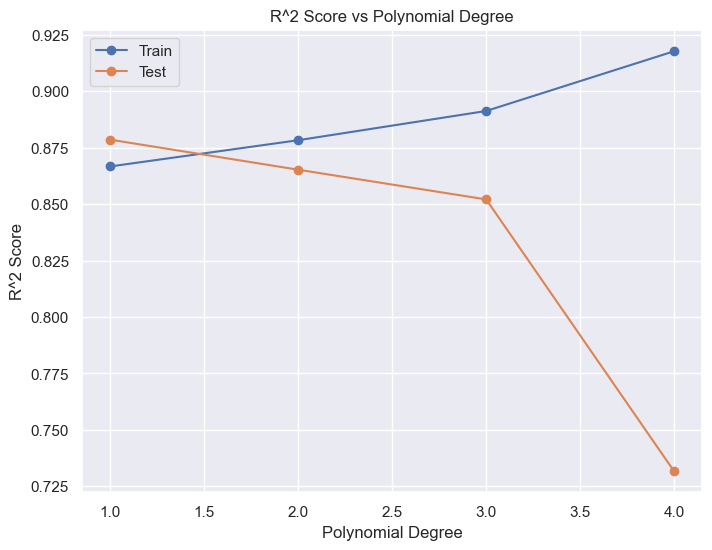

In [20]:
# Define degrees for polynomial features
degrees = [1, 2, 3, 4]

# Initialize lists to store R^2 scores for training and testing data
train_scores = []
test_scores = []

# Loop over degrees
for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    poly_encoded_train_x = poly_features.fit_transform(encoded_train_x)
    poly_encoded_test_x = poly_features.transform(encoded_test_x)
    
    # Fit polynomial regression model
    polynomial_model = LinearRegression()
    polynomial_model.fit(poly_encoded_train_x, train_y)
    
    # Calculate R^2 scores for training and testing data
    train_score = polynomial_model.score(poly_encoded_train_x, train_y)
    test_score = polynomial_model.score(poly_encoded_test_x, test_y)
    
    # Append scores to lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(degrees, train_scores, marker='o', label='Train')
plt.plot(degrees, test_scores, marker='o', label='Test')
plt.xlabel('Polynomial Degree')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train Model
# Create an instance of the KNeighborsClassifier with a chosen number of neighbors ( 5 neighbors)
knn_classifier = KNeighborsClassifier(n_neighbors=5) 

# Fit the classifier to the training data
knn_classifier.fit(encoded_train_x, train_y)

# Predictions
# Use the trained classifier to make predictions on both training and testing data
train_predictions = knn_classifier.predict(encoded_train_x)
test_predictions = knn_classifier.predict(encoded_test_x)

# Evaluate Model
# Calculate accuracy scores to evaluate the model's performance
# These accuracy scores tells how well the model deals with unseen data
train_accuracy = accuracy_score(train_y, train_predictions)
test_accuracy = accuracy_score(test_y, test_predictions)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.25177304964539005
Test Accuracy: 0.02666666666666667


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assume 'encoded_df' contains the encoded features and 'pass/fail' is the target variable
X = encoded_test_x.drop(columns=['pass/fail'])  # Features
y = encoded_test_x['pass/fail']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predictions on the training and testing data
train_predictions = knn_classifier.predict(X_train)
test_predictions = knn_classifier.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


KeyError: "['pass/fail'] not found in axis"